In [2]:
from kbcstorage.client import Client
import csv

client = Client('https://connection.eu-central-1.keboola.com', '858-85291-eKF1fmrOr9AiDGa1HTUf5gEBpbE7nolbeKIAloVE')

# client.tables.list() #vypise seznam tabulek a informace o nich

client.tables.detail('out.c-zzz-01das.product_views_cz')

#STAZENI DAT Z TABULKY:
client.tables.export_to_file(table_id='out.c-zzz-01das.item_cz', path_name='.')
with open('./item_cz', mode='rt', encoding='utf-8') as in_file:
    lazy_lines = (line.replace('\0', '') for line in in_file)
    reader = csv.reader(lazy_lines, lineterminator='\n')
    for row in reader:
        print(row)
        

{'uri': 'https://connection.eu-central-1.keboola.com/v2/storage/tables/out.c-zzz-01das.product_views_cz',
 'id': 'out.c-zzz-01das.product_views_cz',
 'name': 'product_views_cz',
 'displayName': 'product_views_cz',
 'transactional': False,
 'primaryKey': [],
 'syntheticPrimaryKeyEnabled': False,
 'indexedColumns': [],
 'created': '2020-10-18T19:10:25+0200',
 'lastImportDate': '2020-10-28T20:32:35+0100',
 'lastChangeDate': '2020-10-28T20:32:35+0100',
 'rowsCount': 426361609,
 'dataSizeBytes': 3586996736,
 'isAlias': False,
 'isAliasable': True,
 'columns': ['date',
  'user_id_anon',
  'visit_id_anon',
  'product_id',
  'product_detail_views'],
 'columnMetadata': [],
 'attributes': [],
 'metadata': [{'id': '881312826',
   'key': 'KBC.createdBy.component.id',
   'value': 'transformation',
   'provider': 'system',
   'timestamp': '2020-10-18T19:15:14+0200'},
  {'id': '881312827',
   'key': 'KBC.createdBy.configuration.id',
   'value': '191774009',
   'provider': 'system',
   'timestamp': '2

In [4]:
#ZBYTEK UZ JE JEN HRANI S DATY: NEDULEZITE!!!!

import pandas as pd
import os
os.listdir()

['.ipynb_checkpoints',
 'cross-sell-app',
 'Data',
 'database.db',
 'database.ipynb',
 'word2vec.ipynb',
 'ziskatData.ipynb']

In [6]:
#Contents of the Data folder 
os.listdir("Data/")

['cz_item_category',
 'item_cz',
 'list_category',
 'material_attributes_cz',
 'product_views_cz']

In [9]:
dataFile = "Data/material_attributes_cz"
empData = pd.read_csv(dataFile)

In [10]:
type(empData)

pandas.core.frame.DataFrame

In [27]:
# let's check if we imported the file correctly, displaying first 100 rows
empData.head()
# print(len(empData) -len(empData.groupby('id')))
print(empData[empData['MATERIAL_ID'] == 1422386])
print(empData[empData['MATERIAL_ID'] == 712708])
print(empData[empData['MATERIAL_ID'] == 100017832244])
print(empData[empData['MATERIAL_ID'] == 1394189])
print(empData[empData['MATERIAL_ID'] == 816264])


        MATERIAL_ID                                      NAME_GROUPING
176783      1422386  SWISSTEN GRAVITY DRŽÁK DO VENTILACE AUTA S-GRI...
        MATERIAL_ID                                      NAME_GROUPING
104684       712708  Sony Alpha 5100 + 16-50 mm + 55-210 mm Black (...
Empty DataFrame
Columns: [MATERIAL_ID, NAME_GROUPING]
Index: []
        MATERIAL_ID                                      NAME_GROUPING
244756      1394189  Canon PowerShot G7 X Mark II Vlogger Kit (1066...
        MATERIAL_ID                                 NAME_GROUPING
111069       816264  Belis 4 dílná sada nádobí STABIL EXTRA SFINX


In [28]:
empData.columns

Index(['item_id', 'category_id', 'ods_created', 'is_main'], dtype='object')

277376
True
42


,MATERIAL_ID,NAME_GROUPING
94276,868248,Razor Elektrická koloběžka E100 - GLOW
122612,868248,Razor Elektrická koloběžka E100 - GLOW
16353,1115946,DIAGO Deka ke kočárku fleece
137367,1115946,DIAGO Deka ke kočárku fleece
57402,1115952,DIAGO Deka ke kočárku nepromokavá
...,...,...
143516,100002662883,Rossignol HERO ELITE AT + XPress 11
138068,100010044768,Bull's Pouzdro na šipky - Dartsafe - L
262018,100010044768,Bull's Pouzdro na šipky - Dartsafe - L
172586,100016779601,Miler Zdeněk: Krtek a zvuky kolem nás - leporelo


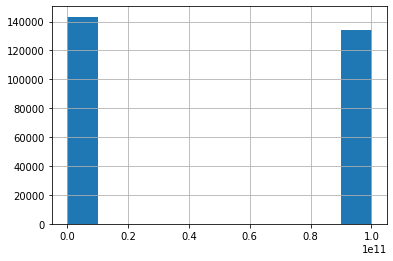

In [52]:
empData['MATERIAL_ID'].hist()
print(len(empData))
print(empData['MATERIAL_ID'].duplicated().any())
print(len(empData) -len(empData.groupby('MATERIAL_ID')))

ids = empData['MATERIAL_ID']
empData[ids.isin(ids[ids.duplicated()])].sort_values('MATERIAL_ID')


In [14]:
# slicing the data by columns
# dataFrame[column_name] or dataFrame[list_of_columns]
empData['date'].head(10)

KeyError: 'date'

In [26]:
# let's select first 10 rows and first column
empData.loc[1:10, 'ods_created']

1     2020-07-09 21:44:38.253979+00
2     2020-07-09 21:44:38.253979+00
3     2020-07-09 21:44:38.253979+00
4     2020-07-09 21:44:38.253979+00
5     2020-07-09 21:44:38.253979+00
6     2020-07-09 21:44:38.253979+00
7     2020-07-09 21:44:38.253979+00
8     2020-07-09 21:44:38.253979+00
9     2020-07-09 21:44:38.253979+00
10    2020-07-09 21:44:38.253979+00
Name: ods_created, dtype: object

In [27]:
# doesn't make sense, right? We'll have to put them into a list of fields
empData.loc[1:10, ['item_id', 'is_main']]

,item_id,is_main
1,6519375,f
2,8126442,t
3,8920208,f
4,7774896,f
5,827213421,t
6,8929822,f
7,6929486,t
8,9850992,t
9,738573541,f
10,8449676,t


In [28]:
# different kind of slicing, through integer-based position
empData.iloc[1:10,1]

1    1015678
2        215
3        237
4       1962
5      45761
6    6411145
7      20240
8        184
9        238
Name: category_id, dtype: int64

In [29]:
# strange, huh? What about this?
empData.iloc[1:10,1:2]

,category_id
1,1015678
2,215
3,237
4,1962
5,45761
6,6411145
7,20240
8,184
9,238


In [30]:
# last slice
empData.iloc[1:10,1:3]

,category_id,ods_created
1,1015678,2020-07-09 21:44:38.253979+00
2,215,2020-07-09 21:44:38.253979+00
3,237,2020-07-09 21:44:38.253979+00
4,1962,2020-07-09 21:44:38.253979+00
5,45761,2020-07-09 21:44:38.253979+00
6,6411145,2020-07-09 21:44:38.253979+00
7,20240,2020-07-09 21:44:38.253979+00
8,184,2020-07-09 21:44:38.253979+00
9,238,2020-07-09 21:44:38.253979+00


In [31]:
# slicing by maps (condition-based slicing)
# let's create a map for all terminated employees
terms = (empData['is_main'] == 't')
terms.head()

0    False
1    False
2     True
3    False
4    False
Name: is_main, dtype: bool

In [32]:
empData.loc[terms,:]

,item_id,category_id,ods_created,is_main
2,8126442,215,2020-07-09 21:44:38.253979+00,t
5,827213421,45761,2020-07-09 21:44:38.253979+00,t
7,6929486,20240,2020-07-09 21:44:38.253979+00,t
8,9850992,184,2020-07-09 21:44:38.253979+00,t
10,8449676,1580,2020-07-09 21:44:38.253979+00,t
11,8124492,193,2020-07-09 21:44:38.253979+00,t
16,8499514,187,2020-07-09 21:44:38.253979+00,t
18,233204112,917072,2020-07-09 21:44:38.253979+00,t
24,9060091,237,2020-07-09 21:44:38.253979+00,t
27,9846230,1795,2020-07-09 21:44:38.253979+00,t


In [33]:
# we can slice it by this
(empData.loc[terms,:]).head()

,item_id,category_id,ods_created,is_main
2,8126442,215,2020-07-09 21:44:38.253979+00,t
5,827213421,45761,2020-07-09 21:44:38.253979+00,t
7,6929486,20240,2020-07-09 21:44:38.253979+00,t
8,9850992,184,2020-07-09 21:44:38.253979+00,t
10,8449676,1580,2020-07-09 21:44:38.253979+00,t


In [36]:
# shape of the data
empData.shape

(100, 4)

In [15]:
# datatypes
empData.dtypes

MATERIAL_ID       int64
NAME_GROUPING    object
dtype: object

In [38]:
# basic description
empData.describe()

,item_id,category_id
count,1.000000e+02,1.000000e+02
mean,6.778797e+07,1.375172e+06
std,1.473851e+08,3.244076e+06
min,6.392685e+06,1.210000e+02
25%,8.111984e+06,2.370000e+02
50%,8.928048e+06,6.193500e+03
75%,4.883863e+07,1.048430e+06
max,8.272134e+08,2.118841e+07


In [51]:
from matplotlib import pyplot
import matplotlib.pyplot as plt

<AxesSubplot:>

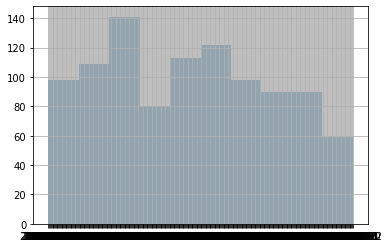

In [52]:
# directly from df/series
empData['date'].hist()

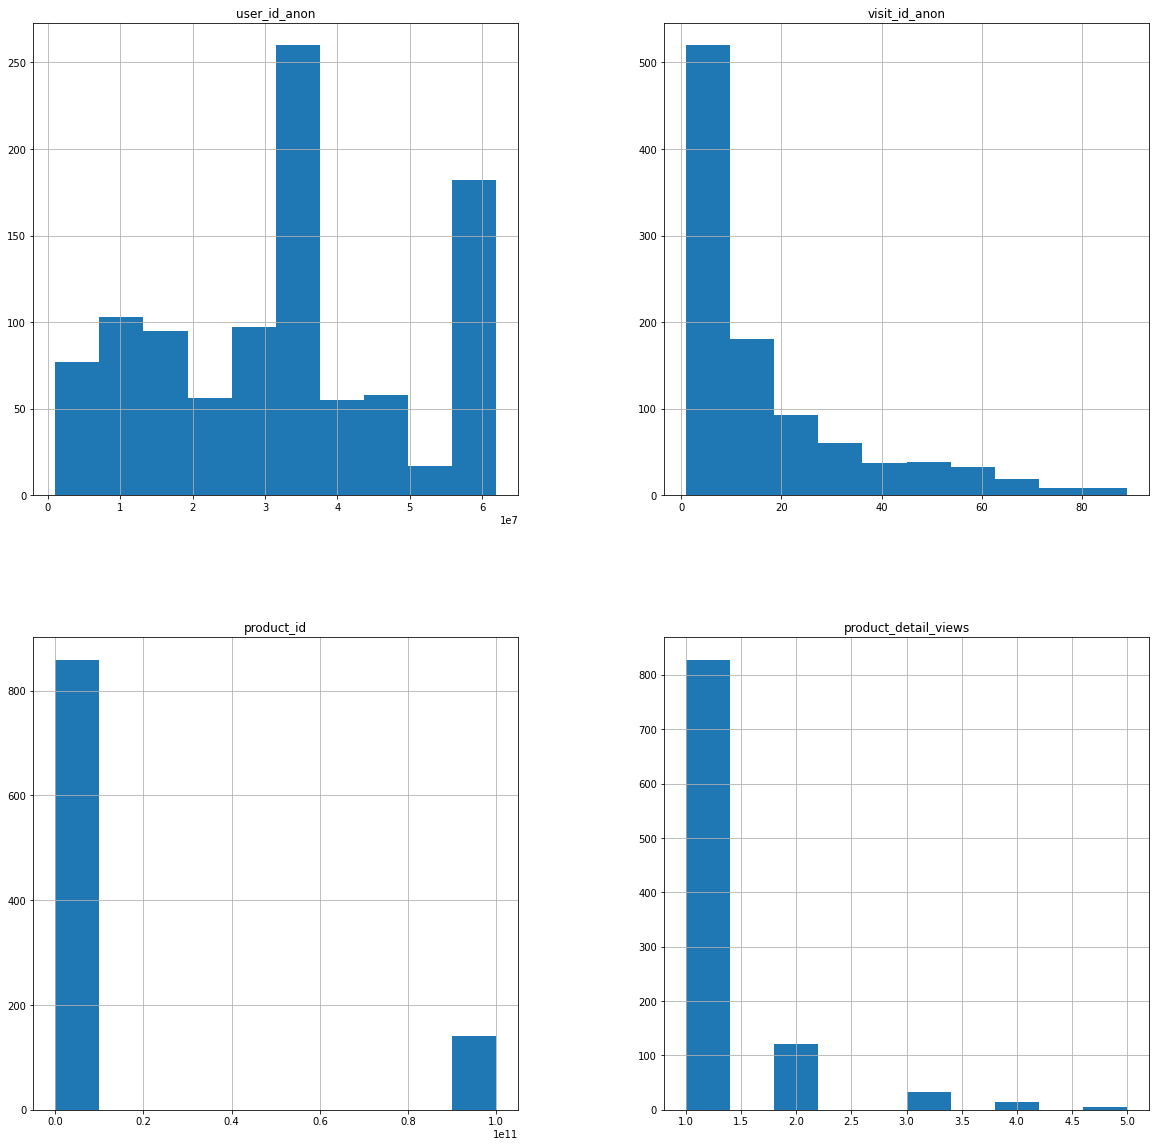

In [53]:
empData.hist(figsize=(20,20))
plt.show()